# Exercise 1 -  Named entity recognition with Harry Potter

In [74]:
import spacy
import nltk
nlp = spacy.load("en_core_web_lg")
import re

In [63]:
with open("harry-potter.txt", "r") as f:
    raw_text = f.read()
    # raw_text = raw_text.replace('\n', " ")

raw_chapters = raw_text.split("CHAPTER")
chapters = []

for i, chapter in enumerate(raw_chapters):
    if i == 0:
        chapters.append((chapter, "N/A"))
        continue
    text_start = re.search("[a-z]", chapter).start() - 1
    chapter_name = chapter[:text_start]
    chapters.append((chapter_name.replace("\n\n", ", ").strip(), chapter[text_start:]
                                                        .replace("\'", "'")
                                                        .replace("\n\n\n", "\n\n")
                                                        .replace("\n\n", "\n")
                                                        .replace("\n", " ").strip()))


In [65]:
text = chapters[1][1]
doc = nlp(text)

In [175]:
subset = nltk.sent_tokenize(text, language="english")[:10]
subset = [nltk.word_tokenize(word) for word in subset]
tagged_subset = nltk.pos_tag_sents(subset, tagset="universal", lang='eng')

In [176]:
chunks = (nltk.ne_chunk_sents(tagged_subset, binary=True))

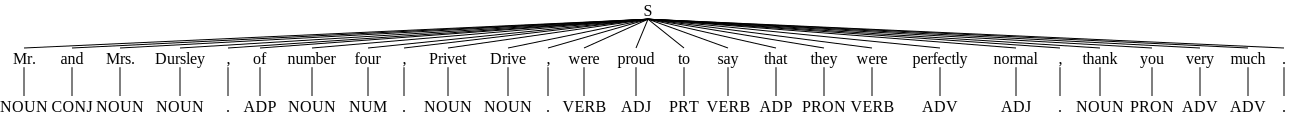

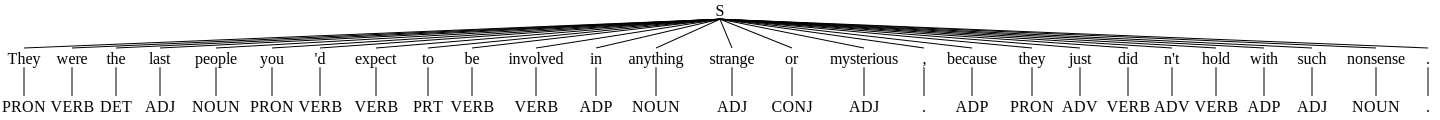

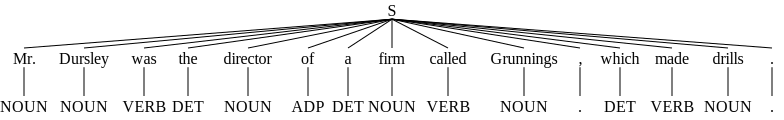

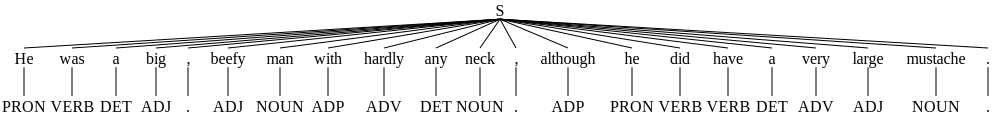

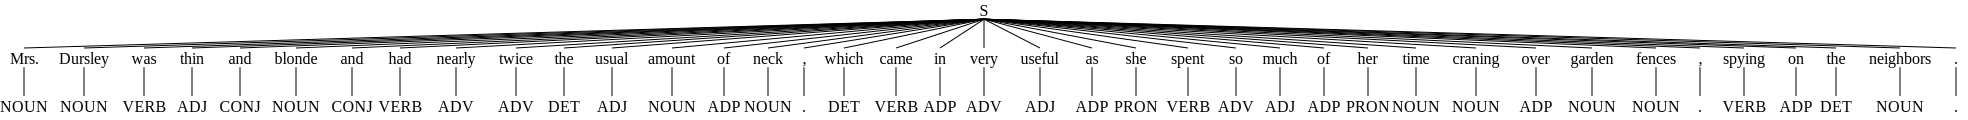

In [203]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

for i in range(5):
    named = (nltk.ne_chunk(tagged_subset[i]))
    named

InteractiveShell.ast_node_interactivity = "last"

In [72]:
from spacy import displacy
render_ent = "ent"
render_dep = "dep"
displacy.render(doc, style=render_ent)